### Climate Change Impact Analysis

#### Climate Data Final Dataset 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer


In [46]:
# Load dataset
file_path = r".\Data\Climate Change - datasets\climate_data_final_df.csv"
climate_merged_df = pd.read_csv(file_path,index_col=0)
climate_merged_df.head()

,Entity,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,...,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita),Average Temperature,mmfrom1993-2008average,Forest area (% of land area),"Population, total",Renewable energy consumption (% of total final energy consumption)
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,280000.0,320000.0,...,320000.0,280000.0,0.0,20000.0,0.168054,12.222920,-22.847396,1.852782,12045660.0,23.0
1,Afghanistan,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,240000.0,300000.0,...,300000.0,240000.0,0.0,20000.0,0.156411,11.212434,-22.814062,1.852782,12238879.0,23.7
2,Afghanistan,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,200000.0,200000.0,...,200000.0,200000.0,0.0,20000.0,0.111609,10.987166,-20.247396,1.852782,13278974.0,27.4
3,Afghanistan,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,160000.0,200000.0,...,200000.0,160000.0,0.0,20000.0,0.099507,11.510678,-22.780729,1.852782,14943172.0,28.5
4,Afghanistan,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,120000.0,190000.0,...,190000.0,120000.0,0.0,20000.0,0.089462,11.846118,-17.980729,1.852782,16250794.0,30.1


In [47]:
# Checking the shape
climate_merged_df.shape

(6323, 28)

In [48]:
# Checking the datatypes 
climate_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6323 entries, 0 to 6354
Data columns (total 28 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Entity                                                              6323 non-null   object 
 1   Year                                                                6323 non-null   int64  
 2   Carbon dioxide emissions from buildings                             6323 non-null   float64
 3   Carbon dioxide emissions from industry                              6323 non-null   float64
 4   Carbon dioxide emissions from land use change and forestry          6323 non-null   float64
 5   Carbon dioxide emissions from other fuel combustion                 6323 non-null   float64
 6   Carbon dioxide emissions from transport                             6323 non-null   float64
 7   Carbon dioxide emiss

In [49]:
# checking the summary statistics
climate_merged_df.describe()

,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,...,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita),Average Temperature,mmfrom1993-2008average,Forest area (% of land area),"Population, total",Renewable energy consumption (% of total final energy consumption)
count,6323.000000,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,...,6.323000e+03,6.323000e+03,6.323000e+03,6.323000e+03,6323.000000,5527.000000,6323.000000,6193.000000,6.323000e+03,6264.000000
mean,2005.529654,5.575472e+07,2.125237e+07,2.690093e+07,1.261191e+07,1.180319e+08,1.026921e+08,6.097247e+06,2.549890e+08,1.958448e+07,...,2.560967e+08,5.544787e+07,1.286635e+07,1.976765e+07,4.748857,19.029716,19.408416,33.460063,1.220099e+08,33.510529
std,9.219966,2.544587e+08,1.185633e+08,2.509279e+08,5.805679e+07,5.829772e+08,5.192009e+08,2.587100e+07,1.225914e+09,9.560421e+07,...,1.231280e+09,2.544258e+08,5.926866e+07,9.650206e+07,7.899655,8.089890,29.163940,24.244169,5.723961e+08,30.427138
min,1990.000000,0.000000e+00,0.000000e+00,-1.637860e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-4.969122,-22.847396,0.000000,8.798000e+03,0.000000
25%,1998.000000,8.000000e+04,1.000000e+04,-7.650000e+05,0.000000e+00,6.200000e+05,1.600000e+05,0.000000e+00,2.200000e+05,7.000000e+04,...,2.200000e+05,0.000000e+00,0.000000e+00,7.000000e+04,0.600898,11.812214,-2.647396,12.160463,2.157018e+06,6.563883
50%,2006.000000,6.600000e+05,4.700000e+05,8.000000e+04,2.500000e+05,3.210000e+06,1.530000e+06,1.500000e+05,3.920000e+06,5.600000e+05,...,3.940000e+06,3.900000e+05,2.700000e+05,5.700000e+05,2.298188,22.619158,14.619271,32.107530,8.365878e+06,24.450000
75%,2014.000000,7.360000e+06,2.865000e+06,1.056000e+07,2.030000e+06,1.827000e+07,1.326500e+07,1.920000e+06,3.344500e+07,3.215000e+06,...,3.357500e+07,9.020000e+06,2.070000e+06,3.250000e+06,6.635468,25.580124,50.461706,51.646391,2.881387e+07,57.525000
max,2021.000000,2.822010e+09,1.696360e+09,2.405250e+09,7.519400e+08,8.279320e+09,6.427310e+09,3.227600e+08,1.622524e+10,1.325790e+09,...,1.630219e+10,3.336260e+09,7.686300e+08,1.338160e+09,364.688320,29.794220,66.704325,96.226381,7.921184e+09,98.300000


In [50]:
# Checking for duplicates
print("Number of duplicates:",climate_merged_df.duplicated().sum())

Number of duplicates: 0


In [51]:
# Check for missing values
missing_values = climate_merged_df.isnull().sum().sort_values(ascending=False)
# missing values as percentage
missing_values_percent = (missing_values/len(climate_merged_df)*100)

missing_summary = pd.DataFrame({"missing values": missing_values,
             "missing values percent":missing_values_percent
             })
missing_summary

,missing values,missing values percent
Average Temperature,796,12.588961
Forest area (% of land area),130,2.055986
Renewable energy consumption (% of total final energy consumption),59,0.933101
Year,0,0.000000
"Population, total",0,0.000000
mmfrom1993-2008average,0,0.000000
Annual CO₂ emissions (per capita),0,0.000000
Greenhouse gas emissions from bunker fuels,0,0.000000
Greenhouse gas emissions from other fuel combustion,0,0.000000
Fugitive emissions of greenhouse gases from energy production,0,0.000000


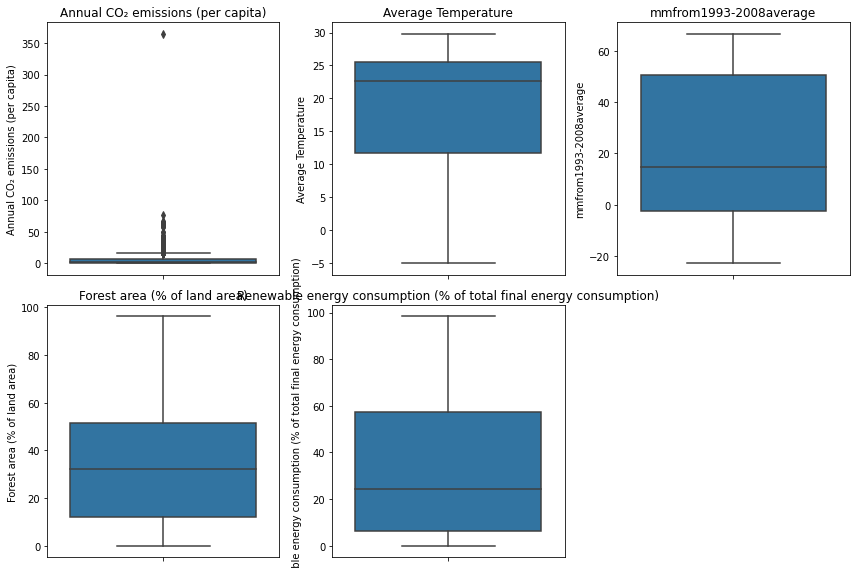

In [52]:
# Checking for outliers 
columns_to_plt = ["Annual CO₂ emissions (per capita)", "Average Temperature", "mmfrom1993-2008average",
                   "Forest area (% of land area)", "Renewable energy consumption (% of total final energy consumption)"]

plt.figure(figsize=(12,8))
for i, col in enumerate(columns_to_plt, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=climate_merged_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### Handle missing values

- using median to fill average temperatures because temperature distributions often have outliers, especially for regions with extreme climates.Median is not significantly affected by outliers.
- Using the mean per country to fill forest area of land and Reneweable energy ensures we fill missing values based on similar data points rather than a global statistic and these values are highly dependent on the country or region.

In [53]:
climate_merged_df["Average Temperature"].fillna(climate_merged_df["Average Temperature"].median(), inplace=True)
climate_merged_df["Forest area (% of land area)"].fillna(climate_merged_df.groupby("Entity")["Forest area (% of land area)"].transform("mean"), inplace=True)
climate_merged_df["Renewable energy consumption (% of total final energy consumption)"].fillna(
    climate_merged_df.groupby("Entity")["Renewable energy consumption (% of total final energy consumption)"].transform("mean"), inplace=True
)

# Verify that missing values are handled
climate_merged_df.isnull().sum().sum()


0

#### Climate Risk Index Dataset

In [54]:
# Load dataset
file_path = r".\Data\Climate Change - datasets\Climate Risk Index.csv"
index_df = pd.read_csv(file_path)
index_df.head()

,index,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
0,0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


In [55]:
# Chaeck the shape of the dataset
index_df.shape

(182, 17)

In [56]:
# Calculate summary statistics
index_df.describe()

,index,cartodb_id,the_geom,the_geom_webmercator,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total
count,182.000000,182.000000,0.0,0.0,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,131.000000,182.000000,182.000000
mean,90.500000,91.500000,NaN,NaN,85.230769,81.791923,78.609890,0.519670,77.626374,86.840659,85.302198,1.517654,85.302198,907.507599
std,52.683014,52.683014,NaN,NaN,44.708529,34.582412,37.858511,3.393934,37.500688,427.350623,44.691600,8.171267,44.691600,4483.998505
min,0.000000,1.000000,NaN,NaN,1.000000,12.170000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000100,1.000000,0.000000
25%,45.250000,46.250000,NaN,NaN,46.250000,52.872500,46.250000,0.000000,46.250000,0.000000,46.250000,0.016500,46.250000,0.000000
50%,90.500000,91.500000,NaN,NaN,91.000000,77.500000,91.500000,0.020000,90.000000,2.000000,91.500000,0.084100,91.500000,30.347000
75%,135.750000,136.750000,NaN,NaN,135.000000,124.500000,114.000000,0.120000,114.000000,22.750000,135.000000,0.275950,135.000000,262.178250
max,181.000000,182.000000,NaN,NaN,135.000000,124.500000,114.000000,43.660000,114.000000,4317.000000,135.000000,77.369400,135.000000,40077.222000


In [57]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      182 non-null    int64  
 1   cartodb_id                 182 non-null    int64  
 2   the_geom                   0 non-null      float64
 3   the_geom_webmercator       0 non-null      float64
 4   country                    182 non-null    object 
 5   cri_rank                   182 non-null    int64  
 6   cri_score                  182 non-null    float64
 7   fatalities_per_100k_rank   182 non-null    int64  
 8   fatalities_per_100k_total  182 non-null    float64
 9   fatalities_rank            182 non-null    int64  
 10  fatalities_total           182 non-null    int64  
 11  losses_per_gdp__rank       182 non-null    int64  
 12  losses_per_gdp__total      131 non-null    float64
 13  losses_usdm_ppp_rank       182 non-null    int64  

1) cri_rank & cri_score
- CRI score and rank measure how severely a country is affected by climate-related events.
A higher CRI rank indicates greater vulnerability to the negative impacts of climate-related disasters.

2) fatalities_per_100k_total & fatalities_rank
 - Show how deadly climate disasters are per 100,000 people.
Higher fatalities suggest regions with poor climate resilience.

3) losses_per_gdp_total & losses_per_gdp_rank
-Shows economic losses as a percentage of GDP, helping measure financial vulnerability.
If losses are high, climate events have a major economic impact in that country.

4) losses_usdm_ppp_total & losses_usdm_ppp_rank
- Shows total climate-induced economic losses in million USD.
Helps to compare how much money different countries lose due to climate-related disasters.

#### Data Cleaning

In [58]:
# Drop the null columns
index_df = index_df.drop(['the_geom','the_geom_webmercator'],axis=1)
# Handle missing values 
index_df['losses_per_gdp__total'].fillna(index_df['losses_per_gdp__total'].median(),inplace=True)
# Drop rows with missing rw_country_code
index_df.dropna(subset=['rw_country_code'],inplace=True)
print("Cleaned dataset overview:")
print(index_df.isnull().sum())

Cleaned dataset overview:
index                        0
cartodb_id                   0
country                      0
cri_rank                     0
cri_score                    0
fatalities_per_100k_rank     0
fatalities_per_100k_total    0
fatalities_rank              0
fatalities_total             0
losses_per_gdp__rank         0
losses_per_gdp__total        0
losses_usdm_ppp_rank         0
losses_usdm_ppp_total        0
rw_country_code              0
rw_country_name              0
dtype: int64


- The dataset has no missing values

#### Checking for Duplicates

In [59]:
print('Number of duplicates:',index_df.duplicated().sum())

Number of duplicates: 0


## 2.0 EDA

## 3.0 Modelling

### 3.1 Forecasting Emissions
- Target: Annual CO2 emissions (per capita)

In [60]:
# Define features and target variable for CO2 emissions prediction
emission_features = ['Forest area (% of land area)',
                       'Renewable energy consumption (% of total final energy consumption)',
                       'Population, total',
                       'Year']
target_variable = 'Annual CO₂ emissions (per capita)'

In [61]:
# Define feature columns and target
X_emission = climate_merged_df[emission_features]
y_emission = climate_merged_df[target_variable]

# Train test split
X_train_emission, X_test_emission,y_train_emission, y_test_emission = train_test_split(
    X_emission, y_emission, test_size=0.2, random_state =42
)

Pipelines for Modelling

* We will use linearRegression as the base model, and also run RandomForestRegressor and XGBRegressor

In [62]:
# Define models
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
xgb_model = XGBRegressor(n_estimators=100, random_state = 42)
lr_model = LinearRegression()

#Define pipeline with feature selection
def create_pipeline(model):
  return Pipeline([
      ('imputer', SimpleImputer(strategy='median')),
      ('scaler', StandardScaler()),
      ('feature_selection',SelectFromModel(RandomForestRegressor(
          n_estimators = 100))),
      ('model', model)

  ])
# Create pipelines for each model
rf_pipeline = create_pipeline(rf_model)
xgb_pipeline = create_pipeline(xgb_model)
lr_pipeline = create_pipeline(lr_model)

# Fit each pipeline
rf_pipeline.fit(X_train_emission,y_train_emission)
xgb_pipeline.fit(X_train_emission,y_train_emission)
lr_pipeline.fit(X_train_emission,y_train_emission)

# Evaluate pipelines on the test data
y_pred_rf_pipeline = rf_pipeline.predict(X_test_emission)
y_pred_xgb_pipeline = xgb_pipeline.predict(X_test_emission)
y_pred_lr_pipeline = lr_pipeline.predict(X_test_emission)

# Calcuate R-Squared and RMSE
evaluation_pipeline_metrics = {
    'Model': ['Random Forest Pipeline','XGBoost Pipeline','Linear Regression Pipeline'],
    'R-squared': [r2_score(y_test_emission,y_pred_rf_pipeline),
                  r2_score(y_test_emission,y_pred_xgb_pipeline),
                  r2_score(y_test_emission,y_pred_lr_pipeline)],
    'RMSE': [ np.sqrt(mean_squared_error(y_test_emission,y_pred_rf_pipeline)),
              np.sqrt(mean_squared_error(y_test_emission,y_pred_xgb_pipeline)),
              np.sqrt(mean_squared_error(y_test_emission,y_pred_lr_pipeline))
        ]

}

# Convert to Dataframe
evaluation_pipeline_df = pd.DataFrame(evaluation_pipeline_metrics)
evaluation_pipeline_df

,Model,R-squared,RMSE
0,Random Forest Pipeline,0.416581,5.291979
1,XGBoost Pipeline,0.804817,3.060897
2,Linear Regression Pipeline,0.250702,5.997289


* Random Forest performed the best, with highest r_2 score (0.81) and lowest RMSE (3.04), suggesting it captures complex relationships in the data.
* XGBoost is close to random foresr, meaning it also performs well for CO2 predictions. It might perform better with tuning.

* Linear Regression performed poorly r_2 score (0.25), meaning a simpler linear approach is not enough to model CO2 emissions effectively.

#### Model Tuning

For tuning we will tune Random Forest and XGBoost as they were the best untuned models

In [63]:
# Define parameter grids for tuning
rf_param_grid = {
    'model__n_estimators':[50, 100, 200],
    'model__max_depth':[10, 20, None],
    'model__min_samples_split': [2,5,10]
}
xgb_param_grid = {
    'model__n_estimators':[50, 100, 200],
    'model__max_depth': [3, 6, 9],
    'model__learning_rate':[0.01, 0.1, 0.2]

                                 }



In [64]:
#GridSearch for Random Forest
rf_grid_search = GridSearchCV(rf_pipeline,param_grid=rf_param_grid,
                              cv=5, scoring ='r2', n_jobs=-1)
rf_grid_search.fit(X_train_emission,y_train_emission)

# GridSearch for XGBoost
xgb_grid_search = GridSearchCV(xgb_pipeline,param_grid=xgb_param_grid,
                               cv=5, scoring ='r2',n_jobs=-1)
xgb_grid_search.fit(X_train_emission,y_train_emission)
# Get best models
rf_best_pipeline = rf_grid_search.best_estimator_
xgb_best_pipeline = xgb_grid_search.best_estimator_
# Dispaly best params
rf_best_pipeline.get_params()
xgb_best_pipeline.get_params()
# Predict with best models
y_pred_rf_best = rf_best_pipeline.predict(X_test_emission)
y_pred_xgb_best = xgb_best_pipeline.predict(X_test_emission)
# Calculate new R-Squared and RMSE
evaluation_tuned_models= {
    'Model': ['Tuned Random Forest Pipeline','Tuned XGBoost Pipeline'],
    'r_2 score': [r2_score(y_test_emission, y_pred_rf_best),
                  r2_score(y_test_emission,y_pred_xgb_best)],
    'RMSE':[
        np.sqrt(mean_squared_error(y_test_emission,y_pred_rf_best)),
        np.sqrt(mean_squared_error(y_test_emission,y_pred_xgb_best))
    ]
}

evaluation_tuned_df = pd.DataFrame(evaluation_tuned_models)
evaluation_tuned_df

,Model,r_2 score,RMSE
0,Tuned Random Forest Pipeline,0.703904,3.770025
1,Tuned XGBoost Pipeline,0.739566,3.535710


* For RF no changes observed between tuned RF model and untuned RF model
* After tuning XGBOOst the model got worst indicating it might have been overfitting earlier

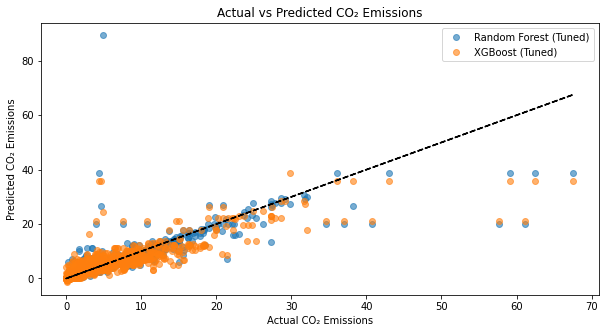

In [65]:
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(10,5))
plt.scatter(y_test_emission, y_pred_rf_best, label="Random Forest (Tuned)", alpha=0.6)
plt.scatter(y_test_emission, y_pred_xgb_best, label="XGBoost (Tuned)", alpha=0.6)
plt.plot(y_test_emission, y_test_emission, color='black', linestyle='--')  # Perfect fit line
plt.xlabel("Actual CO₂ Emissions")
plt.ylabel("Predicted CO₂ Emissions")
plt.title("Actual vs Predicted CO₂ Emissions")
plt.legend()
plt.show()

* Both models performs similary
* XGBoost seems to have slightly lower variance, meaning it generalizes better
* Random Forest, appears to predict some values higher than actual emissions, causing overestimations in some cases

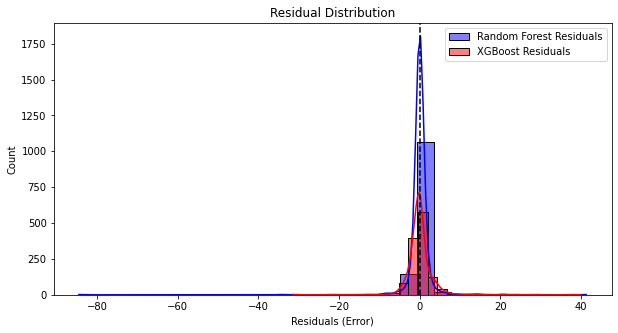

In [66]:
# Residual Plot
plt.figure(figsize=(10,5))
sns.histplot((y_test_emission - y_pred_rf_best), bins=30, color='blue', label="Random Forest Residuals", kde=True)
sns.histplot((y_test_emission - y_pred_xgb_best), bins=30, color='red', label="XGBoost Residuals", kde=True)
plt.axvline(0, color='black', linestyle='--')  # Center line at zero
plt.xlabel("Residuals (Error)")
plt.title("Residual Distribution")
plt.legend()
plt.show()

* Both models have most residuals clustered near 0, meaning the models
are making reasonably accurate predictions.
* Narrower distribution for XGBoost: model seems to have a more concentrated peak, suggesting less variance in errors
* Wider Spread for Random Forest: Random forest has some extreme residuals, meaning makes errors in some cases. This suggests possible overfitting on certain patterns in the training data.
* Slight Right Skewness: There are few high positive residuals(under-predictions), meaning both models sometimes predict lower than actual emissions